# Global Power Plant Project

In [4]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [5]:
#lets load dataset 
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [6]:
#lets check the type of dataset
type(df)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [7]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis(EDA)

In [8]:
#print columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
#print first five rows 
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [10]:
#checking rows and columns
df.shape

(907, 27)

In [11]:
#checking datatype of each column
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [12]:
#  check null values and summing up columns wise
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

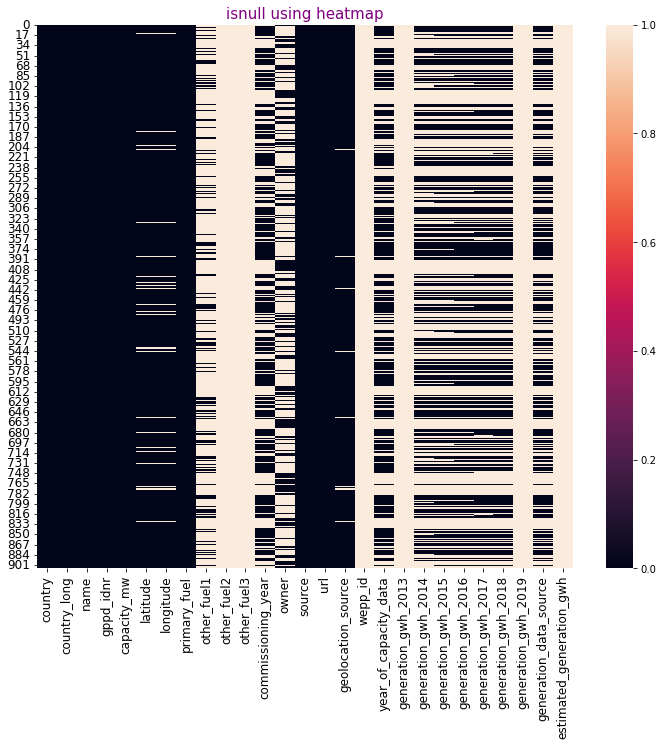

In [14]:
#isnull using heat map
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations:

from the above outcomes we can see that
1. Dataset has 907 rows and 27 columns.
2. There are null values present in the dataset.
3. In the heat map there are lines which shows null.
4. Dataset has object and float64 types datatypes.

In [15]:
# dealing with null values 
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','commissioning_year','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [16]:
#filling other null values with zeros
df['owner']=df['owner'].fillna('None')
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(0)
df['latitude']=df['latitude'].fillna(0)
df['longitude']=df['longitude'].fillna(0)
df['geolocation_source']=df['geolocation_source'].fillna('None')
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(0)
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(0)
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(0)
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(0)
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(0)
df['generation_data_source']=df['generation_data_source'].fillna('None')

In [17]:
#checking null values after replacing with zeros
df.isnull().sum().sum()

0

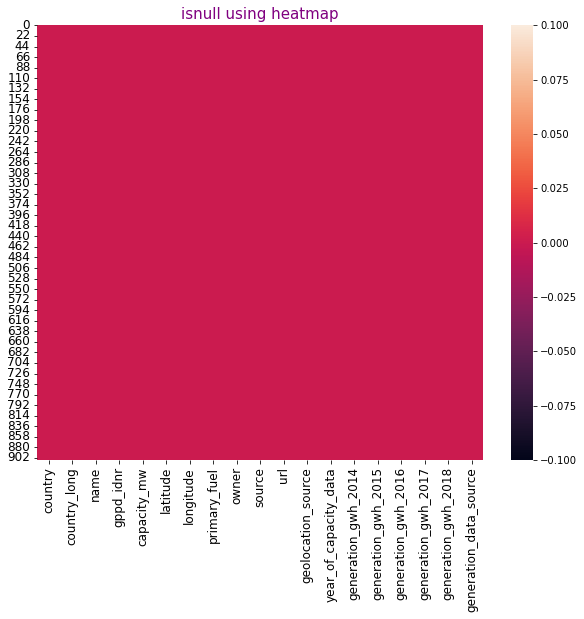

In [18]:
#isnull using heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [19]:
print('Theere are',df.shape[0],'rows and',df.shape[1],'columns in dataset after dropping null columns.')

Theere are 907 rows and 19 columns in dataset after dropping null columns.


In [20]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,0.000000,0.000,0.000000,0.000000,0.000000,None
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.0,0.000000,0.000,0.000000,0.000000,0.000000,None
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,0.000000,0.000,0.000000,0.000000,0.000000,None
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [21]:
# columns after dealing with null values
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [22]:
#Unique values in datset according to columns

print('country:',df['country'].unique())
print('country_long:',df['country_long'].unique())
print('name:',len(df['name'].unique()))
print('gppd_idnr:',len(df['gppd_idnr'].unique()))
print('primary_fuel:',len(df['primary_fuel'].unique()))
print('source:',len(df['source'].unique()))
print('geolocation_source:',len(df['geolocation_source'].unique()))
print('year_of_capacity_data:',df['year_of_capacity_data'].unique())
print('generation_data_source:',df['generation_data_source'].unique())
print('\nshape of dataset after overcoming null values: ', df.shape[0],'rows and ', df.shape[1], 'columns')

country: ['IND']
country_long: ['India']
name: 907
gppd_idnr: 907
primary_fuel: 8
source: 191
geolocation_source: 4
year_of_capacity_data: [   0. 2019.]
generation_data_source: ['None' 'Central Electricity Authority']

shape of dataset after overcoming null values:  907 rows and  19 columns


### Observations

* In our dataset all the power plants are from India only.
* Total 907 power plants and 8 different primary fuels.
* The data in dataset was reprted from 191 different sources.

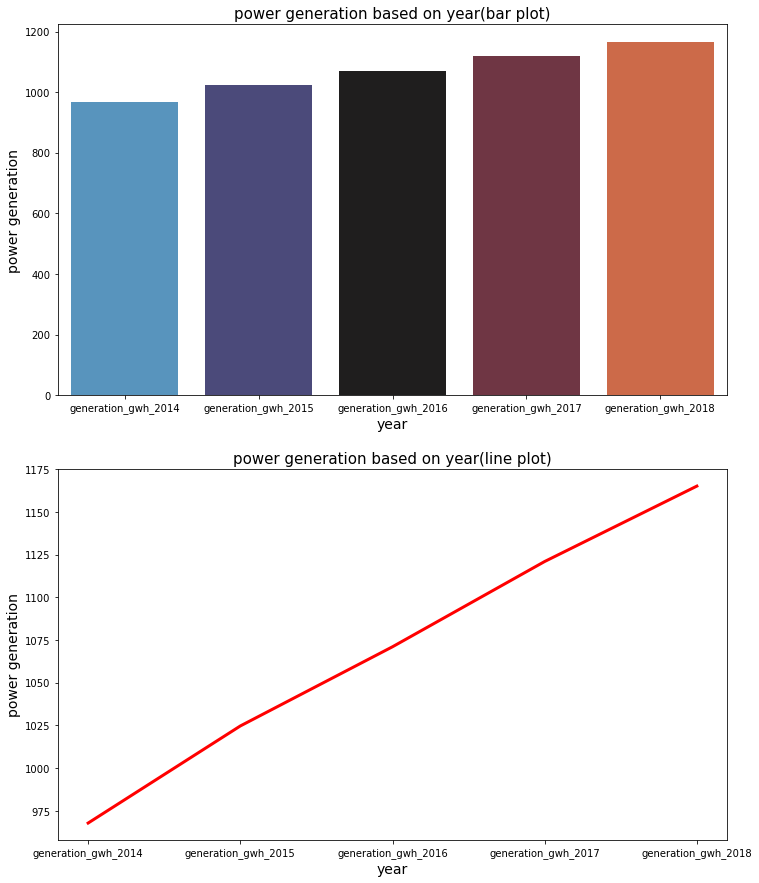

,power generations,Total_power_generation
0,generation_gwh_2014,967.865789
1,generation_gwh_2015,1024.711771
2,generation_gwh_2016,1071.084597
3,generation_gwh_2017,1121.014094
4,generation_gwh_2018,1165.160236


In [23]:
# power generation based on year

df1=df['generation_gwh_2014'].sum()/1000
df2=df['generation_gwh_2015'].sum()/1000
df3=df['generation_gwh_2016'].sum()/1000
df4=df['generation_gwh_2017'].sum()/1000
df5=df['generation_gwh_2018'].sum()/1000
power_generations_df=pd.DataFrame({'power generations':['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],'Total_power_generation':[df1,df2,df3,df4,df5]},index=[0,1,2,3,4])

plt.figure(figsize=(12,15))

plt.subplot(2,1,1)
sns.barplot(power_generations_df['power generations'],power_generations_df['Total_power_generation'], palette='icefire')
plt.title('power generation based on year(bar plot)', fontsize=15)
plt.xlabel('year', fontsize=14)
plt.ylabel('power generation', fontsize=14)

plt.subplot(2,1,2)
sns.lineplot(power_generations_df['power generations'],power_generations_df['Total_power_generation'], linewidth='3', color='red')
plt.title('power generation based on year(line plot)', fontsize=15)
plt.xlabel('year', fontsize=14)
plt.ylabel('power generation', fontsize=14)
plt.show()


power_generations_df

### Observations

* From the above outcome we can see that the highest power was generated in the year 2018 which is 1165.160236 terawatt-hour.
* According to the report the least power was generated in the year 2014 which is 967.865789terawatt-hour
* From 2014 to 2018 the power generation kept increased.
* But in 2013 and 2019 the was no power generation recorded.

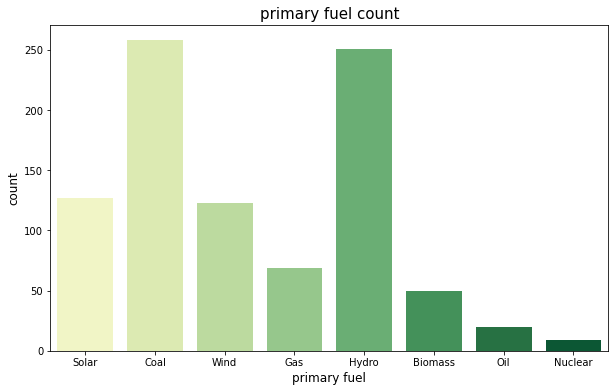

primary fuels: ['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Total different primary fuels:  8


In [24]:
# primary fuels
plt.figure(figsize=(10,6))
sns.countplot(df['primary_fuel'], palette='YlGn')
plt.title('primary fuel count', fontsize=15)
plt.xlabel('primary fuel', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

print('primary fuels:', df['primary_fuel'].unique())
print('Total different primary fuels: ', len(df['primary_fuel'].unique()))

### Observations

* In India the are more power plants which uses Coal as its primary fuel followed by hydro compared to others.
* power plants which use Nuclear as primary fuel are least in numbers in our dataset compared to others.

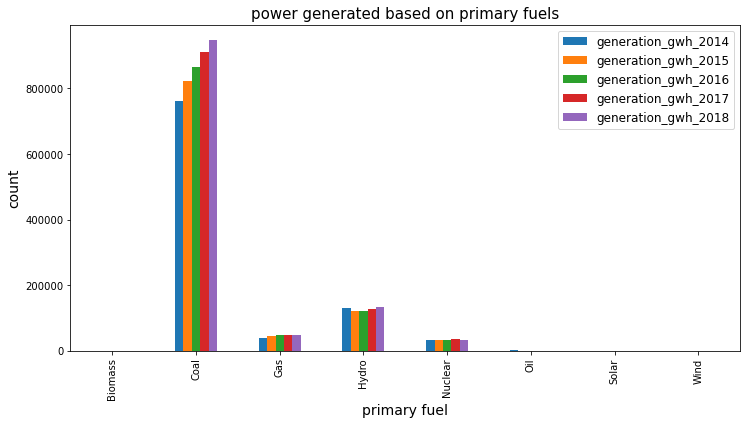

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
primary_fuel,,,,,
Biomass,0.000000,0.000000,0.000000,0.000000,0.000000
Coal,762701.968920,822976.677975,866544.578110,910790.472360,946847.079336
Gas,40099.876382,46208.780652,47925.719163,49348.106481,49106.188266
Hydro,129551.355420,121408.501625,122380.663790,126287.022845,134987.471238
Nuclear,34072.893150,33879.000000,34180.870000,34587.320000,34216.250000
Oil,1439.695026,238.810943,52.765584,1.172299,3.247360
Solar,0.000000,0.000000,0.000000,0.000000,0.000000
Wind,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
#Avacados sold based on years
df_copy=df.copy()
df_copy.drop(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_data_source'],axis=1,inplace=True)


df_copy.groupby(['primary_fuel']).sum().plot(kind='bar',figsize=(12,6),legend=True)
plt.legend(fontsize=12)
plt.title ('power generated based on primary fuels', fontsize=15)
plt.xlabel('primary fuel',fontsize=14)
plt.ylabel('count', fontsize=14)

plt.show()

df_copy.groupby(['primary_fuel']).sum()

### Observations

* Power plants which use coal as primary fuel generated most of the electricity from the year 2014  to 2018
* Power plants which use hydro as primary fuel comes second in the list of power generated from the year 2014 to 2018
* Gas and Nuclear comes in third and in fourth position respectivly and oil comes last.
* But power plants which uses Biomass , Solar and Wind as primary fuel has generated zero electricity from the year 2014 to year 2018

In [26]:
len(df['owner'].unique())

281

* we have 281 different owners who holds the maximum shares of the power plants mentioned in the dataset.

In [27]:
import folium as fm

In [28]:
df_list=df[['name','latitude','longitude']].values.tolist()
maps=fm.Map(location=[28.1839,73.2407])
f=fm.map.FeatureGroup(name='pp_maps')

for i in df_list:
    f.add_child(fm.features.CircleMarker(location=[i[1],i[2]],radius=5,color='red',fill_color='blue'))
    fm.features.Marker(location=[i[1],i[2]],popup=i[0],icon=fm.Icon(color='blue')).add_to(maps)
maps.add_child(f)

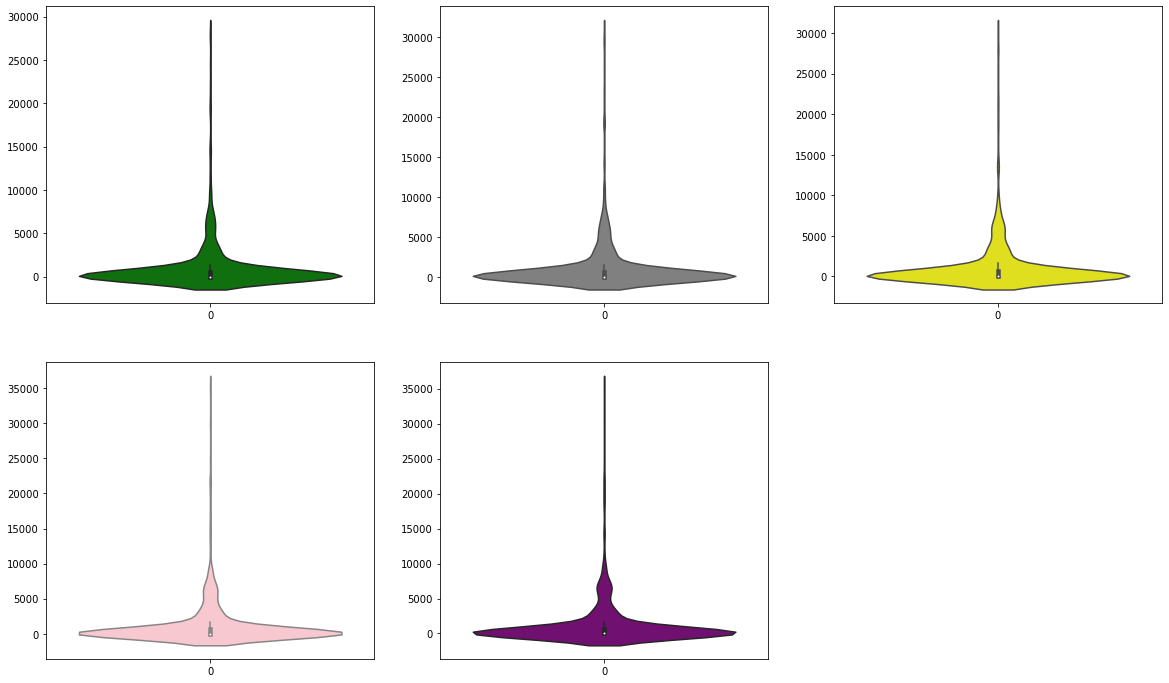

In [29]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.violinplot(data=df['generation_gwh_2014'], color='green')

plt.subplot(2,3,2)
sns.violinplot(data=df['generation_gwh_2015'], color='grey')

plt.subplot(2,3,3)
sns.violinplot(data=df['generation_gwh_2016'], color='yellow')

plt.subplot(2,3,4)
sns.violinplot(data=df['generation_gwh_2017'], color='pink')

plt.subplot(2,3,5)
sns.violinplot(data=df['generation_gwh_2018'], color='purple')

plt.show()

<Figure size 1440x1800 with 0 Axes>

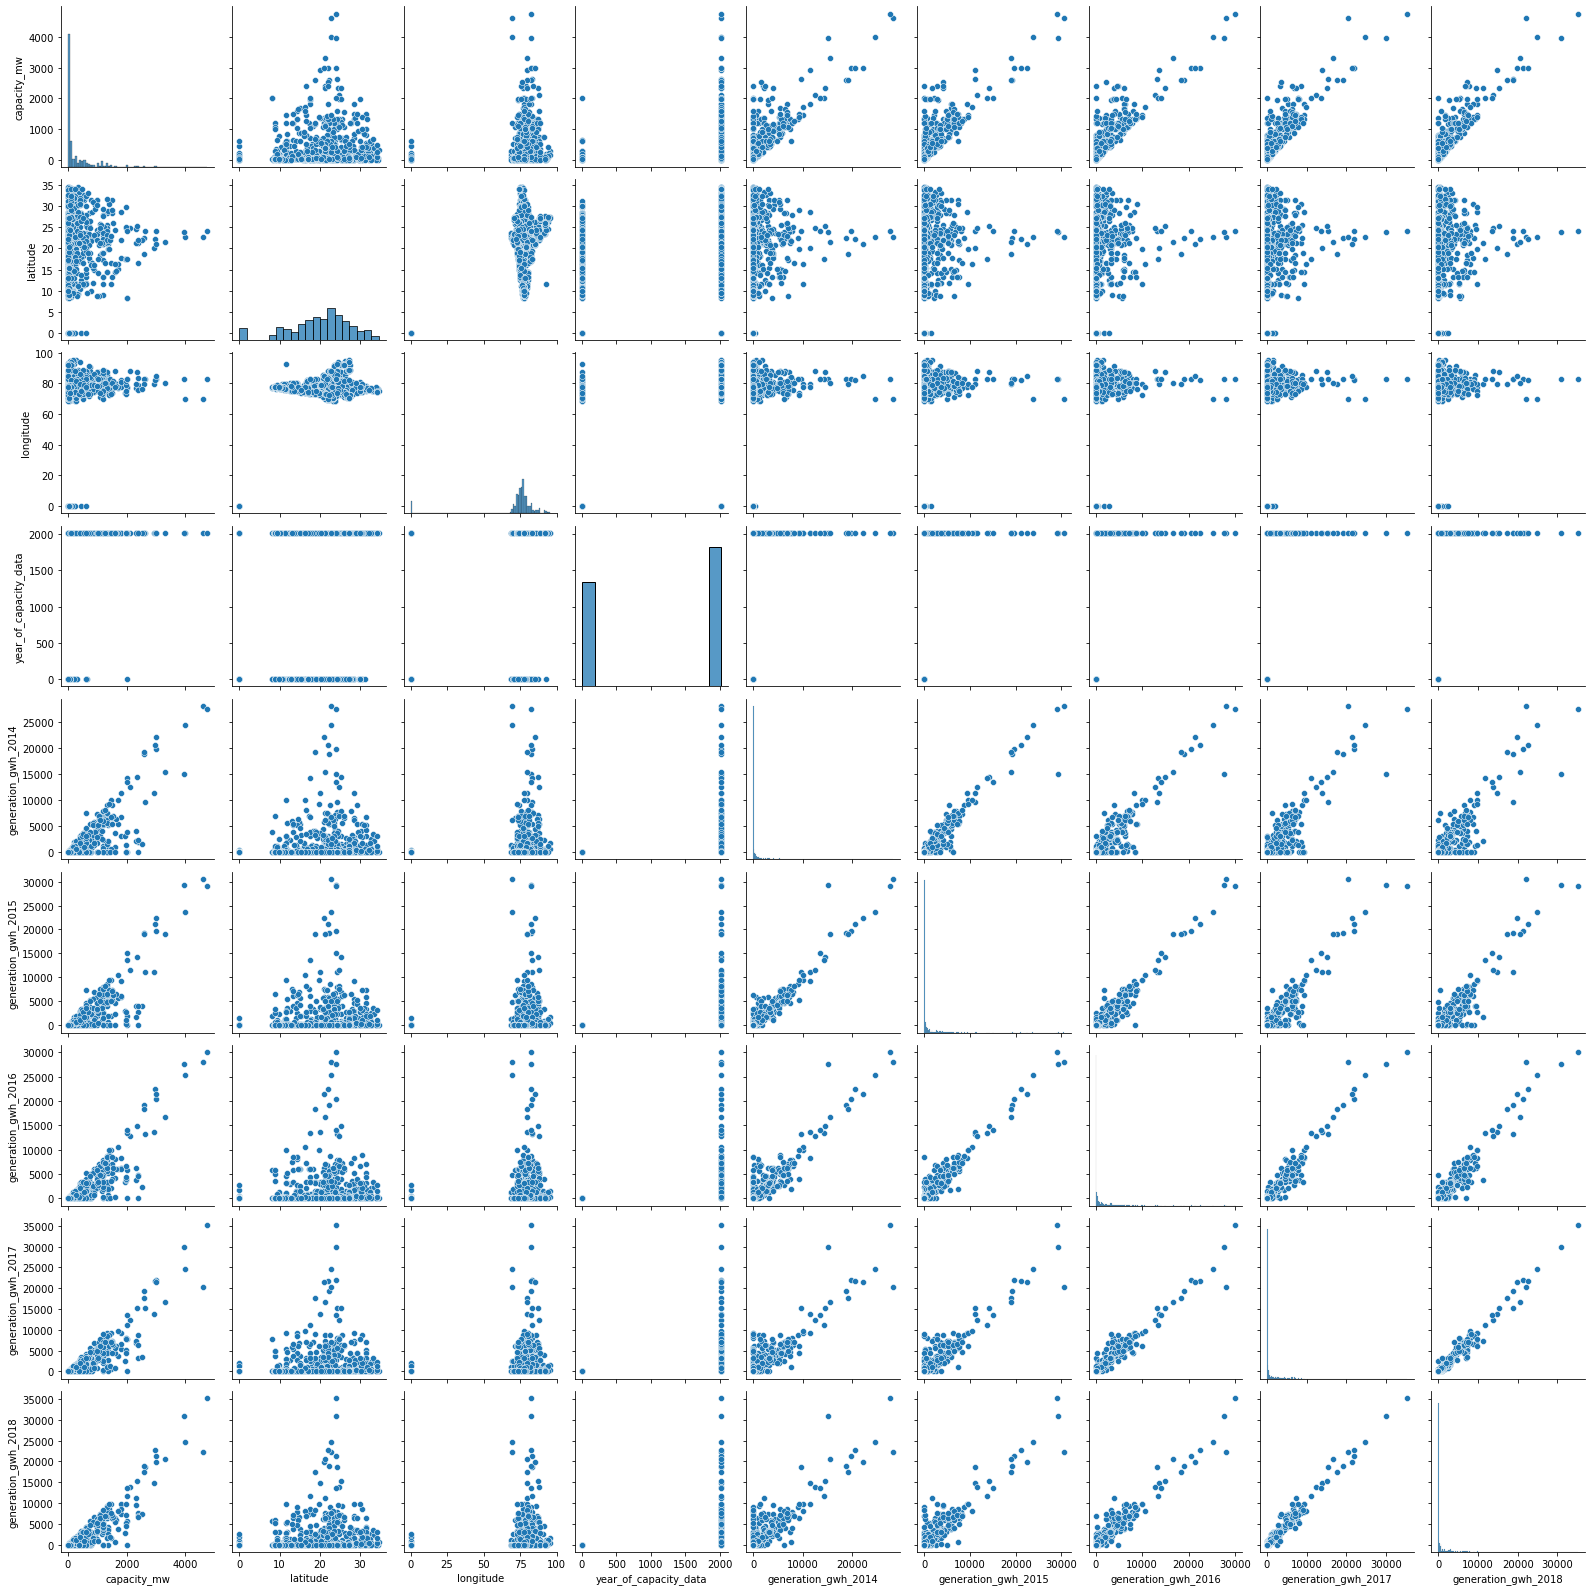

In [30]:
plt.figure(figsize=(20,25))
sns.pairplot(df)
plt.show()

* pairplot gives relationship between the columns

# correlation

In [31]:
df.corr()

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.103618,0.153272,0.417896,0.815794,0.842964,0.876811,0.894259,0.906774
latitude,0.103618,1.000000,0.592760,0.058729,0.100765,0.096393,0.089594,0.102933,0.099208
longitude,0.153272,0.592760,1.000000,0.109744,0.118932,0.121014,0.124467,0.130957,0.131175
year_of_capacity_data,0.417896,0.058729,0.109744,1.000000,0.315496,0.314722,0.326281,0.335479,0.336951
generation_gwh_2014,0.815794,0.100765,0.118932,0.315496,1.000000,0.966869,0.938079,0.907753,0.898900
generation_gwh_2015,0.842964,0.096393,0.121014,0.314722,0.966869,1.000000,0.974772,0.944057,0.936856
generation_gwh_2016,0.876811,0.089594,0.124467,0.326281,0.938079,0.974772,1.000000,0.976470,0.967814
generation_gwh_2017,0.894259,0.102933,0.130957,0.335479,0.907753,0.944057,0.976470,1.000000,0.988117
generation_gwh_2018,0.906774,0.099208,0.131175,0.336951,0.898900,0.936856,0.967814,0.988117,1.000000


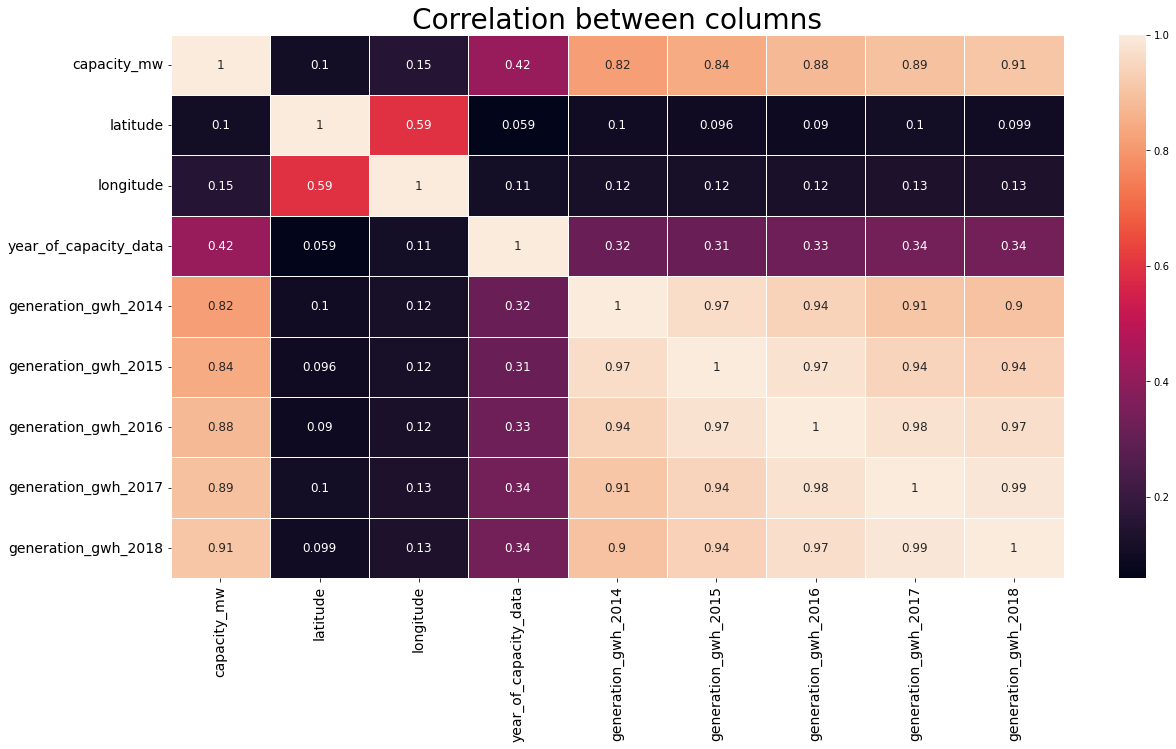

In [32]:
#df.corr() using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidth='0.5',linecolor='white',annot=True, annot_kws={'size': 12})
plt.title('Correlation between columns', size=28)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

### Observations

* All the numeric are positively correlated with target column.
* generation_gwh_2018 column show highest positive correlation of 91 percent with target column.
* generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 shows a very good correlation of 82, 84,88,89 percent respectively. which means amount of  generation of electricity depends on capacity of the power plant.
* year_of_capacity_data show 42 percent correlation with target column

# Describing Dataset

In [33]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907,907,907,907,907.000000,907.000000,907.000000,907,907,907,907,907,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907
unique,1,1,907,907,NaN,NaN,NaN,8,281,191,304,4,NaN,NaN,NaN,NaN,NaN,NaN,2
top,IND,India,ACME Solar Tower,WRI1020239,NaN,NaN,NaN,Coal,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,None
freq,907,907,1,1,NaN,NaN,NaN,258,565,519,519,765,NaN,NaN,NaN,NaN,NaN,NaN,458
mean,NaN,NaN,NaN,NaN,326.223755,20.122831,73.536147,NaN,NaN,NaN,NaN,NaN,1155.304300,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911,NaN
std,NaN,NaN,NaN,NaN,590.085456,7.655960,17.674358,NaN,NaN,NaN,NaN,NaN,999.466215,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.172050,73.811550,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.281800,76.493800,NaN,NaN,NaN,NaN,NaN,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.176450,79.206100,NaN,NaN,NaN,NaN,NaN,2019.000000,556.562750,598.926350,670.039394,709.290725,687.754000,NaN


# checking outliers

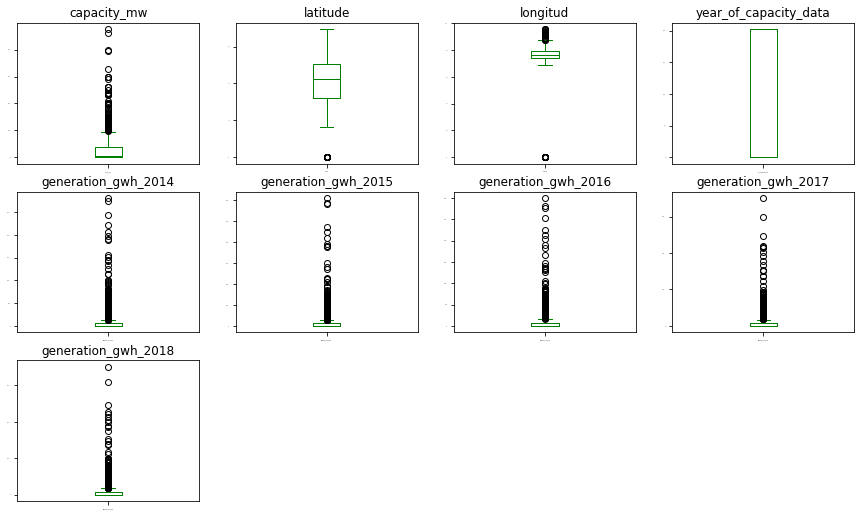

In [34]:
#vizualizing outliers
list_col=['capacity_mw','latitude','longitud','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
df.plot(kind='box',title=list_col, subplots=True, layout=(5,4), legend= True, fontsize=1, figsize=(15,15), color='green')
plt.show()

### Observations

* 'year_of_capacity_data' column doesnot have outliers 
* It seems that latitude and longitude columns have outliers.
* And all the other columns might have outliers

# skewness:

In [35]:
df.skew()

capacity_mw              3.123576
latitude                -0.730074
longitude               -3.581827
year_of_capacity_data   -0.292409
generation_gwh_2014      4.986588
generation_gwh_2015      5.260778
generation_gwh_2016      4.984874
generation_gwh_2017      4.979870
generation_gwh_2018      4.846091
dtype: float64

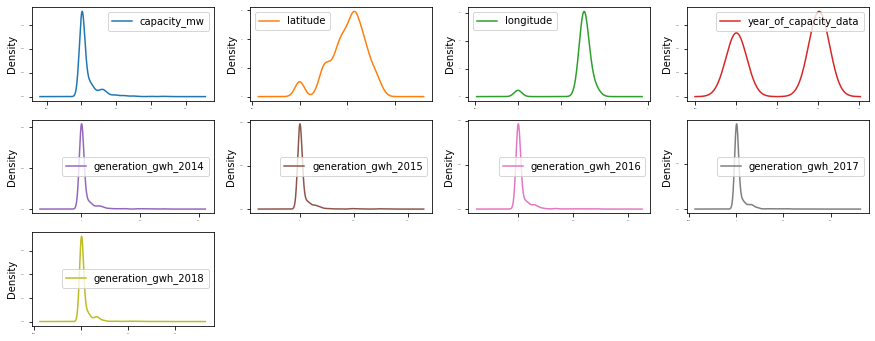

In [36]:
#vizualizing skewness
df.plot(kind='kde', subplots=True, layout=(5,4), sharex= False, legend= True, fontsize=1, figsize=(15,10))
plt.show()

### Observations

* It seems all the numeric columns have skewness
* year_of_capacity_data shows binary heads.

# Findings(insights)

From the above observations it has been analysed that:
* According to our dataset,Thermal power plants tops the list in generating electricity among all the power plants located in India.
* Among all the thermal plants, coal is the most used fossil fuel as primary fuel for power plants.
* From 2014 to 2018 the generation of electricity inscreased over time ,it means the requiremnt for electricity has incresed which increased the power generation over these years.
* we can also tell that the cause for increase in electricity requirement over time is, increase in human population and also increase in usage of electrically operated devices.
* It is safe to use hydro power plants which are the second largest electricity genartors in India because it reduces pollution especially air pollution caused by thermal power plants and water is renewable also.
* So building of hydro power plants should be promoted.

# Data Preprocessing

# Label Encoding

In [37]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,0.000000,0.000,0.000000,0.000000,0.000000,None
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.0,0.000000,0.000,0.000000,0.000000,0.000000,None
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,0.000000,0.000,0.000000,0.000000,0.000000,None
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


* Before labelencoding we are dropping the columns which posses same meaning for example 'country' and 'country_long' columns have same meaning and same identity so dropping one of them.

In [38]:
df1=df.drop(['country_long','gppd_idnr','url'],axis=1)
df1.sample(2)

,country,name,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
355,IND,KOLHAPUR KAGAL,20.0,16.5890,74.2993,Biomass,Shri Vedganga ssk,Shri Vedganga ssk,WRI,0.0,0.0000,0.0000,0.0000,0.0000,0.000,None
592,IND,PORINGALKUTTU,32.0,10.3118,76.6170,Hydro,None,Central Electricity Authority,WRI,2019.0,150.2649,158.9015,90.6445,116.1563,94.127,Central Electricity Authority


In [39]:
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df1['country'])
#transforming data
df1['country']=le.transform(df1['country'])

le.fit(df1['year_of_capacity_data'])
df1['year_of_capacity_data']=le.transform(df1['year_of_capacity_data'])

le.fit(df1['name'])
df1['name']=le.transform(df1['name'])

le.fit(df1['generation_data_source'])
df1['generation_data_source']=le.transform(df1['generation_data_source'])

le.fit(df1['primary_fuel'])
df1['primary_fuel']=le.transform(df1['primary_fuel'])

le.fit(df1['source'])
df1['source']=le.transform(df1['source'])

le.fit(df1['geolocation_source'])
df1['geolocation_source']=le.transform(df1['geolocation_source'])

le.fit(df1['owner'])
df1['owner']=le.transform(df1['owner'])

In [40]:
df1.sample(3)

,country,name,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
43,0,43,180.0,32.8063,76.1418,3,165,22,3,1,792.68665,741.862050,665.98335,638.52135,364.83665,0
212,0,212,310.0,22.3758,73.1017,2,165,22,3,1,699.40000,932.130000,751.74300,693.29600,680.98100,0
64,0,64,120.0,13.1021,80.2682,2,165,22,3,1,2.85387,8.295912,10.46898,5.85771,0.05600,0


# Removing outliers:

using Zscore technique

In [41]:
from scipy.stats import zscore

In [42]:
z =np.abs(zscore(df1['capacity_mw']))
print(len(np.where(z<3)))
dn=df1[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

1
Shape of New Dataframe dn: (887, 16)


In [43]:
z =np.abs(zscore(dn['generation_gwh_2014']))
print(z)
print(len(np.where(z<3)))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

0      0.429069
1      0.429069
2      0.429069
3      0.091413
4      1.230028
         ...   
902    0.429069
903    0.429069
904    0.429069
905    0.429069
906    0.429069
Name: generation_gwh_2014, Length: 887, dtype: float64
1
Shape of New Dataframe dn1: (858, 16)


In [44]:
z =np.abs(zscore(dn1['generation_gwh_2015']))
print(z)
print(len(np.where(z<3)))
dn2=dn1[(z<3)]
print('Shape of New Dataframe dn2:',dn2.shape)

0      0.447910
1      0.447910
2      0.447910
3      0.193434
4      4.049206
         ...   
902    0.447154
903    0.447910
904    0.447910
905    0.447910
906    0.447910
Name: generation_gwh_2015, Length: 858, dtype: float64
1
Shape of New Dataframe dn2: (828, 16)


In [45]:
z =np.abs(zscore(dn2['generation_gwh_2016']))
print(z)
print(len(np.where(z<3)))
dn3=dn2[(z<3)]
print('Shape of New Dataframe dn3:',dn3.shape)

0      0.435857
1      0.435857
2      0.435857
3      0.386424
5      0.655345
         ...   
902    0.219061
903    0.435857
904    0.435857
905    0.435857
906    0.435857
Name: generation_gwh_2016, Length: 828, dtype: float64
1
Shape of New Dataframe dn3: (811, 16)


In [46]:
z =np.abs(zscore(dn3['generation_gwh_2017']))
print(z)
print(len(np.where(z<3)))
dn4=dn3[(z<3)]
print('Shape of New Dataframe dn4:',dn4.shape)

0      0.442823
1      0.442823
2      0.442823
3      0.281591
5      0.809959
         ...   
902    0.501636
903    0.442823
904    0.442823
905    0.442823
906    0.442823
Name: generation_gwh_2017, Length: 811, dtype: float64
1
Shape of New Dataframe dn4: (790, 16)


In [47]:
z =np.abs(zscore(dn4['generation_gwh_2018']))
print(z)
print(len(np.where(z<3)))
dn5=dn4[(z<3)]
print('Shape of New Dataframe dn4:',dn5.shape)

0      0.465134
1      0.465134
2      0.465134
3      0.416125
5      0.909239
         ...   
902    0.500926
903    0.465134
904    0.465134
905    0.465134
906    0.465134
Name: generation_gwh_2018, Length: 790, dtype: float64
1
Shape of New Dataframe dn4: (756, 16)


In [48]:
dn5.head(2)

,country,name,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,2.5,28.1839,73.2407,6,230,109,1,0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,98.0,24.7663,74.6090,1,259,174,3,0,0.0,0.0,0.0,0.0,0.0,1


In [49]:
df_new=dn5
print('old dataframe',df1.shape)
print('new dataframe',df_new.shape)
print('no of rows dropped',df1.shape[0]-df_new.shape[0])

old dataframe (907, 16)
new dataframe (756, 16)
no of rows dropped 151


# Splitting data into x(features) and y(target)

In [50]:
df_new.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,2.5,28.1839,73.2407,6,230,109,1,0,0.000000,0.000,0.000000,0.0000,0.000000,1
1,0,1,98.0,24.7663,74.6090,1,259,174,3,0,0.000000,0.000,0.000000,0.0000,0.000000,1
2,0,2,39.2,21.9038,69.3732,7,2,21,3,0,0.000000,0.000,0.000000,0.0000,0.000000,1
3,0,3,135.0,23.8712,91.3602,2,165,22,3,1,617.789264,843.747,886.004428,663.7745,626.239128,0
5,0,5,250.0,23.7689,68.6447,1,165,22,3,1,1153.421000,1208.852,1175.765000,1147.9130,976.655000,0


In [51]:
#splitting data into x and y 
x=df_new.drop('capacity_mw', axis=1) # dropping target column from dataframe and assigning the dataframe as x
y=df_new['capacity_mw'] #assigning target column(W) to y variable

In [52]:
x.sample()

,country,name,latitude,longitude,primary_fuel,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
865,0,865,19.7674,73.502,3,165,22,3,1,202.8009,122.0069,152.7524,203.5969,153.39915,0


In [53]:
y.sample()

426    31.5
Name: capacity_mw, dtype: float64

# VIF(checking multicolinearity)

In [54]:
#library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,country,NaN
1,name,4.103648
2,latitude,13.252283
3,longitude,23.802740
4,primary_fuel,5.880255
5,owner,17.795941
6,source,6.615859
7,geolocation_source,11.393970
8,year_of_capacity_data,6.261497
9,generation_gwh_2014,7.923240


# Feature selection

In [56]:
df_new.drop(['latitude','longitude'],axis=1,inplace=True)

# Removing skewness

In [57]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [58]:
x_df=pd.DataFrame(x)
x_df.skew()

0     0.000000
1    -0.277259
2    -0.345863
3    -1.663261
4    -0.113487
5    -0.187734
6    -0.100597
7    -1.646995
8     0.053034
9     0.844350
10    0.768070
11    0.744020
12    0.730316
13    0.702329
14   -0.433952
dtype: float64

# scaling independent data

using StandardScaler

In [59]:
#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
scaler.fit(x)
x_scaled=scaler.transform(x)

# Model Building and Evaluation

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Since our target variable(capacity_mw) is continous data we use Regression Models

# Random Forest Regressor

### Finding Best Random State for Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRS=0

for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #creating instance for RandomForestRegressor
    RFR = RandomForestRegressor()
    # training model using training data
    RFR.fit(x_train, y_train)
    #predicting the data
    pred_RFR=RFR.predict(x_test)
    acc=r2_score(y_test,pred_RFR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.4122040790399686 random_state 1
Accuracy 0.5127082343780003 random_state 2
Accuracy 0.6537652119164497 random_state 3
Accuracy 0.6987308949482613 random_state 4
Accuracy 0.7344472568787017 random_state 59
Accuracy 0.7795985184431706 random_state 131


## Random Forest Regressor with best random state

In [64]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=131)

In [65]:
#printing shape of train and test data
print('x_train2 shape: ',x_train2.shape)
print('x_test2 shape: ',x_test2.shape)
print('y_train2 shape: ',y_train2.shape)
print('y_test2 shape: ',y_test2.shape)

x_train2 shape:  (604, 15)
x_test2 shape:  (152, 15)
y_train2 shape:  (604,)
y_test2 shape:  (152,)


In [66]:
#creating instance for RandomForestRegressor
RFR = RandomForestRegressor()

# training model using training data
RFR.fit(x_train2, y_train2)

#predicting the data
RFR_pred=RFR.predict(x_test2)

## Evaluation

In [67]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test2,RFR_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test2)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 47.03033881578947 
 mean absolute error percentage: 438.31 %


In [68]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test2,RFR_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test2)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 8647.911094557017 
 mean squared error percentage: 80596.4 %


In [69]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 92.99414548538536


In [70]:
#calculating the mean squared log error
from sklearn.metrics import mean_squared_log_error

msle=mean_squared_log_error(y_test2,RFR_pred)
print(' mean squared log error:', msle)

 mean squared log error: 0.8021465310576958


In [71]:
#calculating score of train and test data
print('score for training of model: ',RFR.score(x_train2,y_train2))

score for training of model:  0.9263546666503439


In [72]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test2,RFR_pred),'\n\nAccuracy:',round(100*(r2_score(y_test2,RFR_pred)),2),'%')

r2_score: 0.7861438151563289 

Accuracy: 78.61 %


## cross-validation of the model

In [73]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test2,RFR_pred)


scr=cross_val_score(RFR,x,y,cv=19)
print('cross validation score of Random Forest Regressor at cross fold 19: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of Random Forest Regressor at cross fold 19:  56.88662878156292 and accuracy score of testing model is: 78.61438151563289


# KNeighbors Regressor

### Finding best random state for KNeighbors Regressor

In [74]:
from sklearn.neighbors import KNeighborsRegressor

maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #creating the instance
    kn = KNeighborsRegressor(n_neighbors=2)

    #training the data
    kn.fit(x_train,y_train)

    #predicting the data
    pred_kn=kn.predict(x_test)
    acc=r2_score(y_test,pred_kn)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.2219646718148438 random_state 1
Accuracy 0.27712815855801154 random_state 3
Accuracy 0.5894763566678249 random_state 21


### KNeighbors Regressor with best random state

In [75]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,random_state=1428)

#creating the instance
kn = KNeighborsRegressor(n_neighbors=2)

#training the data
kn.fit(x_train1,y_train1)

#predicting the data
kn_pred=kn.predict(x_test1)

## Evaluation

In [76]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test1,kn_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test1)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 68.35801315789473 
 mean absolute error percentage: 630.31 %


In [77]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test1,kn_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test1)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 17778.19419401316 
 mean squared error percentage: 163928.6 %


In [78]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 133.33489488507183


In [79]:
#calculating score of train and test data
print('score for training of model: ',kn.score(x_train1,y_train1))

score for training of model:  0.7461271573446913


In [80]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test1,kn_pred),'\n\nAccuracy:',round(100*(r2_score(y_test1,kn_pred)),2),'%')

r2_score: 0.6028904144725988 

Accuracy: 60.29 %


## cross-validation of the model

In [81]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test1,kn_pred)


scr=cross_val_score(kn,x,y,cv=5)
print('cross validation score of Random Forest Regressor at cross fold 19: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of Random Forest Regressor at cross fold 19:  18.012076594322192 and accuracy score of testing model is: 60.28904144725988


# XGBRegressor

### Finding best random state for XGBRegressor

In [82]:
from xgboost.sklearn import XGBRegressor

In [83]:
maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    xgb=XGBRegressor()
    #training the data
    xgb.fit(x_train,y_train)

    #predicting the data
    pred_xgb=xgb.predict(x_test)
    acc=r2_score(y_test,pred_xgb)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.5951968232173237 random_state 1
Accuracy 0.6582450143489562 random_state 3
Accuracy 0.6989984372034279 random_state 36
Accuracy 0.7184235682077862 random_state 48
Accuracy 0.7387729123158899 random_state 72
Accuracy 0.7438464026390129 random_state 131


## XGBRegressor with best random state

In [84]:
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=855)

In [85]:
#printing shape of train and test data
print('x_train4 shape: ',x_train4.shape)
print('x_test4 shape: ',x_test4.shape)
print('y_train4 shape: ',y_train4.shape)
print('y_test4 shape: ',y_test4.shape)

x_train4 shape:  (604, 15)
x_test4 shape:  (152, 15)
y_train4 shape:  (604,)
y_test4 shape:  (152,)


In [86]:
xgb=XGBRegressor()

#training the data
xgb.fit(x_train4,y_train4)

#predicting the data
xgb_pred=xgb.predict(x_test4)

## Evaluation

In [87]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test4,xgb_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test4)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 46.836326696631154 
 mean absolute error percentage: 361.1 %


In [88]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test4,xgb_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test4)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 7382.6383516378655 
 mean squared error percentage: 56918.1 %


In [89]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 85.92228088009458


In [90]:
#calculating score of train and test data
print('score for training of model: ',xgb.score(x_train4,y_train4))

score for training of model:  0.9997212191686611


In [91]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test4,xgb_pred),'\n\nAccuracy:',round(100*(r2_score(y_test4,xgb_pred)),2),'%')

r2_score: 0.7894744909878166 

Accuracy: 78.95 %


## cross-validation of the model

In [92]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test4,xgb_pred)


scr=cross_val_score(xgb,x,y,cv=19)
print('cross validation score of XGBRegressor at cross fold 19: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of XGBRegressor at cross fold 19:  49.58937363982044 and accuracy score of testing model is: 78.94744909878166


# DecisionTreeRegressor

### Finding best random state for DecisionTreeRegressor

In [93]:
from sklearn.tree import DecisionTreeRegressor

maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #creating the instance
    DTC=DecisionTreeRegressor()

    #training the data
    DTC.fit(x_train,y_train)

    #predicting the data
    pred_DTC=DTC.predict(x_test)
    acc=r2_score(y_test,pred_DTC)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.27352218056687894 random_state 1
Accuracy 0.40337269410972254 random_state 2
Accuracy 0.4034770265654424 random_state 18
Accuracy 0.4409332954214532 random_state 26
Accuracy 0.44134815873082733 random_state 38
Accuracy 0.4703047723990845 random_state 47
Accuracy 0.48597290622130895 random_state 51
Accuracy 0.5105993022137463 random_state 58
Accuracy 0.6732877543092113 random_state 72
Accuracy 0.6995474637414757 random_state 113


### DecisionTreeRegressor with best random state

In [94]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x_scaled,y,test_size=0.20,random_state=131)

In [95]:
#printing shape of train and test data
print('x_train3 shape: ',x_train3.shape)
print('x_test3 shape: ',x_test3.shape)
print('y_train3 shape: ',y_train3.shape)
print('y_test3 shape: ',y_test3.shape)

x_train3 shape:  (604, 15)
x_test3 shape:  (152, 15)
y_train3 shape:  (604,)
y_test3 shape:  (152,)


In [96]:
#creating the instance
DTC=DecisionTreeRegressor()

#training the data
DTC.fit(x_train3,y_train3)

#predicting the data
DTC_pred=DTC.predict(x_test3)

## Evaluation

In [97]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test3,DTC_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test3)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 50.094605263157895 
 mean absolute error percentage: 466.87 %


In [98]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test3,DTC_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test3)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 10930.62566973684 
 mean squared error percentage: 101870.74 %


In [99]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 104.54963256624502


In [100]:
#calculating score of train and test data
print('score for training of model: ',DTC.score(x_train3,y_train3))

score for training of model:  1.0


In [101]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test3,DTC_pred),'\n\nAccuracy:',round(100*(r2_score(y_test3,DTC_pred)),2),'%')

r2_score: 0.729694040777606 

Accuracy: 72.97 %


## cross-validation of the model

In [102]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test3,DTC_pred)


scr=cross_val_score(DTC,x,y,cv=5)
print('cross validation score of DecisionTreeRegressor at cross fold 5: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of DecisionTreeRegressor at cross fold 5:  40.25488064078455 and accuracy score of testing model is: 72.9694040777606


# GradientBoostingRegressor

### Finding best random state for GradientBoostingRegressor

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

maxAcc=0
maxRS=0

for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #creating the instance
    GBR=GradientBoostingRegressor()
    
    #training the data
    GBR.fit(x_train,y_train)

    #predicting the data
    pred_GBR=GBR.predict(x_test)
    acc=r2_score(y_test,pred_GBR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.28312076377463846 random_state 1
Accuracy 0.6194812706934796 random_state 3
Accuracy 0.6334004142480987 random_state 10
Accuracy 0.6400824080897861 random_state 12
Accuracy 0.7036913387010109 random_state 44
Accuracy 0.742697572351156 random_state 74
Accuracy 0.7472853443925382 random_state 101


In [104]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x_scaled,y,test_size=0.20,random_state=101)

#creating the instance
GBR=GradientBoostingRegressor()

#training the data
GBR.fit(x_train5,y_train5)

#predicting the data
GBR_pred=GBR.predict(x_test5)

## Evaluation

In [105]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test5,GBR_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test5)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 58.91322052574922 
 mean absolute error percentage: 576.97 %


In [106]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test5,GBR_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test5)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 11726.549153147542 
 mean squared error percentage: 114844.15 %


In [107]:
#calculating score of train and test data
print('score for training of model: ',GBR.score(x_train5,y_train5))

score for training of model:  0.9036899349391124


In [108]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test5,GBR_pred),'\n\nAccuracy:',round(100*(r2_score(y_test5,GBR_pred)),2),'%')

r2_score: 0.745100300782599 

Accuracy: 74.51 %


## cross-validation of the model

In [109]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test5,GBR_pred)


scr=cross_val_score(GBR,x,y,cv=19)
print('cross validation score of GradientBoostingRegressor at cross fold 19: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of GradientBoostingRegressor at cross fold 19:  53.26930420999339 and accuracy score of testing model is: 74.5100300782599


# Hyper Parameter Tuning: Ensembled techniques

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
GBR=GradientBoostingRegressor()

In [116]:
parameters={'n_estimators':[100],'criterion':['friedman_mse','mse','mae'],'random_state':[45,46,50,75,100,None],'loss' : ['ls', 'lad', 'huber', 'quantile']}

In [118]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(GBR,parameters)
gcv.fit(x_train5,y_train5)

print(gcv.best_params_)

{'criterion': 'mse', 'loss': 'huber', 'n_estimators': 100, 'random_state': 46}


In [122]:
#creating the instance
GBR_best=GradientBoostingRegressor(criterion= 'mse', loss='huber', n_estimators=100, random_state=46)

#training the data
GBR_best.fit(x_train5,y_train5)

#predicting the data
GBR_best_pred=GBR_best.predict(x_test5)

## Evaluation

In [124]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test5,GBR_best_pred),'\n\nAccuracy:',round(100*(r2_score(y_test5,GBR_best_pred)),2),'%')

r2_score: 0.7140142511704158 

Accuracy: 71.4 %


## cross validation

In [125]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test5,GBR_best_pred)


scr=cross_val_score(GBR_best,x,y,cv=19)
print('cross validation score of Tuned GradientBoostingRegressor at cross fold 19: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of Tuned GradientBoostingRegressor at cross fold 19:  54.984218113909954 and accuracy score of testing model is: 71.40142511704158


# Model Saving(Regression Model)

In [127]:
import pickle

In [128]:
GBR_best_file='global_powerplant_Regression.pkl'
pickle.dump(GBR_best,open(GBR_best_file,'wb'))

# Conclusion

* I have selected this model based on its accuracy score, r2_score and cv score
* The accuracy score for this model is 71.40  and the cv score is 54.98, this means the model is less overfitting/underfitting compared to others.

# Classification

## keeping primary fuel as target

In [129]:
df_new.head()

,country,name,capacity_mw,primary_fuel,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,2.5,6,230,109,1,0,0.000000,0.000,0.000000,0.0000,0.000000,1
1,0,1,98.0,1,259,174,3,0,0.000000,0.000,0.000000,0.0000,0.000000,1
2,0,2,39.2,7,2,21,3,0,0.000000,0.000,0.000000,0.0000,0.000000,1
3,0,3,135.0,2,165,22,3,1,617.789264,843.747,886.004428,663.7745,626.239128,0
5,0,5,250.0,1,165,22,3,1,1153.421000,1208.852,1175.765000,1147.9130,976.655000,0


In [130]:
#splitting data into x and y 
x=df_new.drop('primary_fuel', axis=1) # dropping target column from dataframe and assigning the dataframe as x
y=df_new['primary_fuel'] #assigning target column(W) to y variable

In [131]:
x.sample()

,country,name,capacity_mw,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
497,0,497,15.0,252,170,3,0,0.0,0.0,0.0,0.0,0.0,1


In [132]:
y.sample()

500    7
Name: primary_fuel, dtype: int32

# VIF(checking multicolinearity)

In [133]:
#library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,country,NaN
1,name,3.939335
2,capacity_mw,2.199323
3,owner,13.022399
4,source,4.228556
5,geolocation_source,7.747224
6,year_of_capacity_data,5.490219
7,generation_gwh_2014,7.907731
8,generation_gwh_2015,10.373596
9,generation_gwh_2016,12.263040


# Removing skewness

In [135]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [136]:
x_df=pd.DataFrame(x)
x_df.skew()

0     0.000000
1    -0.277259
2     0.011942
3    -0.187734
4    -0.100597
5    -1.646995
6     0.053034
7     0.844350
8     0.768070
9     0.744020
10    0.730316
11    0.702329
12   -0.433952
dtype: float64

# scaling independent data

In [137]:
#using StandardScaler

#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

# Model Building and Evaluation

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree Classifier

## Finding Best Random State

In [139]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    DTC=DecisionTreeClassifier() #creating instance 
    DTC.fit(x_train,y_train)  #traing data
    DTC_pred=DTC.predict(x_test) #predicting data.fit(x_train,y_train)
    acc=accuracy_score(y_test,DTC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7368421052631579 random_state 1
Accuracy 0.7697368421052632 random_state 2
Accuracy 0.8092105263157895 random_state 3
Accuracy 0.8289473684210527 random_state 4
Accuracy 0.8552631578947368 random_state 131


## Decision Tree Classifier with best random state

In [140]:
#creating train , test split
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=131)

DTC=DecisionTreeClassifier() #creating instance 
DTC.fit(x_train2,y_train2)  #traing data
DTC_pred=DTC.predict(x_test2) #predicting data

## Evaluation

In [141]:
#checking score for training model
print('Score for training model :',DTC.score(x_train2,y_train2))

Score for training model : 1.0


In [142]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test2,DTC_pred))
#print confusion matrics
print(confusion_matrix(y_test2,DTC_pred))
#printing classification report
print(classification_report(y_test2,DTC_pred))

Accuracy:  0.8421052631578947
[[ 6  2  1  0  0  0  0  0]
 [ 1 16  2  1  0  0  0  0]
 [ 0  2  3  4  1  0  0  0]
 [ 0  3  4 49  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.64      0.80      0.71        20
           2       0.27      0.30      0.29        10
           3       0.91      0.88      0.89        56
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        25

    accuracy                           0.84       152
   macro avg       0.58      0.58      0.58       152
weighted avg       0.84      0.84      0.84       152



## cross validation

In [143]:
scr=cross_val_score(DTC,x,y,cv=50)
print('cross validation score of DecissionTreeClassifier at cv folds is : ',scr.mean())

cross validation score of DecissionTreeClassifier at cv folds is :  0.7625833333333332


# Gaussian Naive Bayes

## Finding Best Random State

In [144]:
from sklearn.naive_bayes import GaussianNB
maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    GNB = GaussianNB()
    GNB.fit(x_train, y_train)
    GNB_pred=GNB.predict(x_test)
    acc=accuracy_score(y_test,GNB_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7039473684210527 random_state 1
Accuracy 0.756578947368421 random_state 2
Accuracy 0.7631578947368421 random_state 29
Accuracy 0.7697368421052632 random_state 42
Accuracy 0.7828947368421053 random_state 69


## Gaussian Naive Bayes with best random state

In [145]:
#creating train , test split
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=69)

#creating instance
GNB = GaussianNB()

#training data
GNB.fit(x_train4, y_train4)

#predicting data
GNB_pred=GNB.predict(x_test4)

# Evaluation

In [146]:
#checking score for training model
print('Score for training model :',GNB.score(x_train4,y_train4))

Score for training model : 0.6903973509933775


In [147]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test4,GNB_pred))
#print confusion matrics
print(confusion_matrix(y_test4,GNB_pred))
#printing classification report
print(classification_report(y_test4,GNB_pred))

Accuracy:  0.7828947368421053
[[12  0  0  0  0  0  0]
 [10  0  0  6  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0 48  0  0  0]
 [ 1  0  0  3  0  0  0]
 [ 0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        13
           3       0.69      1.00      0.81        48
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        29

    accuracy                           0.78       152
   macro avg       0.46      0.57      0.50       152
weighted avg       0.65      0.78      0.70       152



## cross validation

In [148]:
scr=cross_val_score(GNB,x,y,cv=15)
print('cross validation score of Gaussian Naive Bayes at cv folds 15 : ',scr.mean())

cross validation score of Gaussian Naive Bayes at cv folds 15 :  0.6919738562091502


# Random Forest Classifier

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
maxAcc=0
maxRS=0

for i in range(50,80):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    RFC=RandomForestClassifier() #creating instance 
    RFC.fit(x_train,y_train)  #traing data
    RFC_pred=RFC.predict(x_test) #predicting data
    acc=accuracy_score(y_test,RFC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8026315789473685 random_state 50
Accuracy 0.8552631578947368 random_state 52
Accuracy 0.8881578947368421 random_state 62


## Random Forest Classifier with best random state

In [151]:
#creating train , test split
x_train5,x_test5,y_train5,y_test5=train_test_split(x_scaled,y,test_size=0.20,random_state=62)

RFC=RandomForestClassifier() #creating instance 
RFC.fit(x_train5,y_train5)  #traing data
RFC_pred=RFC.predict(x_test5) #predicting data

## Evaluation

In [152]:
#checking score for training model
print('Score for training model :',RFC.score(x_train5,y_train5))

Score for training model : 1.0


In [153]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test5,RFC_pred))
#print confusion matrics
print(confusion_matrix(y_test5,RFC_pred))
#printing classification report
print(classification_report(y_test5,RFC_pred))

Accuracy:  0.8421052631578947
[[ 8  3  0  0  0  0  0  0]
 [ 0 17  5  4  1  0  0  0]
 [ 0  1  1  4  0  0  0  0]
 [ 0  3  0 43  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.68      0.63      0.65        27
           2       0.14      0.17      0.15         6
           3       0.83      0.93      0.88        46
           4       0.00      0.00      0.00         0
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        27

    accuracy                           0.84       152
   macro avg       0.71      0.59      0.62       152
weighted avg       0.86      0.84      0.84       152



## cross validation

In [154]:
scr=cross_val_score(RFC,x,y,cv=15)
print('cross validation score of RandomForestClassifier at cv folds 15 : ',scr.mean())

cross validation score of RandomForestClassifier at cv folds 15 :  0.7871372549019607


# Hyper parameter tuning

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameters= {'criterion': ['gini', 'entropy'], 'bootstrap': [True,False],'max_features':['sqrt', 'auto', None]}

In [157]:
RFC=RandomForestClassifier() 

GCV= GridSearchCV(RFC, parameters)
GCV.fit(x_train5,y_train5)
print(GCV.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}


In [164]:
RFC_best2=RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_features='sqrt') #creating instance 
RFC_best2.fit(x_train5,y_train5)  #traing data
RFC_best2_pred=RFC_best2.predict(x_test5) #predicting data

## Evaluation

In [165]:
#checking score for training model
print('Score for hyper tuned training model :',RFC_best2.score(x_train5,y_train5))

Score for hyper tuned training model : 1.0


In [166]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test5,RFC_best2_pred))
#print confusion matrics
print(confusion_matrix(y_test5,RFC_best2_pred))
#printing classification report
print(classification_report(y_test5,RFC_best2_pred))

Accuracy:  0.8552631578947368
[[ 8  1  2  0  0  0  0]
 [ 0 19  4  4  0  0  0]
 [ 0  0  1  5  0  0  0]
 [ 0  4  0 42  0  0  0]
 [ 0  1  0  1  2  0  0]
 [ 0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.76      0.70      0.73        27
           2       0.14      0.17      0.15         6
           3       0.81      0.91      0.86        46
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        27

    accuracy                           0.86       152
   macro avg       0.82      0.72      0.75       152
weighted avg       0.87      0.86      0.86       152



## cross validation

In [167]:
scr=cross_val_score(RFC_best2,x,y,cv=5)
print('cross validation score of Tuned RandomForestClassifier at cv folds 5 : ',round(scr.mean(),2)*100)

cross validation score of Tuned RandomForestClassifier at cv folds 5 :  79.0


# Model Saving(Classificaton)

In [168]:
import pickle

In [169]:
RFC_best2_file='global_powerplant.pkl'
pickle.dump(RFC_best2,open(RFC_best2_file,'wb'))

# Conclusion:

* I have choosed this model as my final model on the basis of accuracy score, cv score precision, recall and f1 score.
* The accuracy score for this model is 85.5 and cv score is 80 it means there is very less overfitting/underfitting.